In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
read_df = pd.read_csv(Path('../Data/cleaned_adoptions2020_2021.csv'))

In [78]:
bins = [-1,1,7,30,90,100,1000000]
classifier=['0','1','2','3','4','5']
# ageCategory = ["same_day","first_week","first_month","three_months","hundred_days","longer"]

read_df["adoption_bin"] = pd.cut(read_df["adoption_days"], bins, labels = classifier)

In [79]:
read_df

,id,name,url,type,primary_breed,seondary_breed,mixed_breed,unknown_breed,primary_color,secondary_color,...,postcode,country,adopt_date,post_date,adoption_days,breed_count,tag_input,photo_input,description_input,adoption_bin
0,50175720,Remy,https://www.petfinder.com/dog/remy-50175720/ga...,Dog,Speciality,NaN,False,False,"Tricolor (Brown, Black, & White)",NaN,...,30127,US,2021-02-02,2020-12-31,33,169,True,True,True,3
1,50175862,Peapod*little hiking buddy,https://www.petfinder.com/dog/peapod-star-litt...,Dog,Chihuahua,NaN,True,False,Golden,NaN,...,95945,US,2021-02-06,2020-12-31,37,2773,False,True,True,3
2,50175865,Pups,https://www.petfinder.com/dog/pups-50175865/md...,Dog,Mixed Breed,NaN,True,False,Unanswered,NaN,...,20637,US,2021-01-03,2020-12-31,3,2618,False,True,True,1
3,50175869,Macy--NEEDS A QUIET HOME,https://www.petfinder.com/dog/macy-needs-a-qui...,Dog,Speciality,Lhasa Apso,True,False,White / Cream,NaN,...,37064,US,2021-01-16,2020-12-31,16,195,False,True,True,2
4,50175868,Rachel,https://www.petfinder.com/dog/rachel-50175868/...,Dog,Chihuahua,NaN,False,False,Brown / Chocolate,NaN,...,95948,US,2021-01-08,2020-12-31,8,2773,False,True,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41491,49797566,Oak,https://www.petfinder.com/dog/oak-49797566/ca/...,Dog,Australian Shepherd,Dachshund,True,False,Merle (Blue),NaN,...,91604,US,2020-11-17,2020-11-15,2,896,False,True,True,1
41492,49797481,Pinto,https://www.petfinder.com/dog/pinto-49797481/c...,Dog,Speciality,Chihuahua,True,False,Black,White / Cream,...,92130,US,2020-12-04,2020-11-15,19,119,False,True,True,2
41493,49797578,Rocco,https://www.petfinder.com/dog/rocco-49797578/n...,Dog,Pit Bull Terrier,NaN,True,False,Brown / Chocolate,White / Cream,...,12550,US,2021-10-06,2020-11-15,325,2950,False,True,True,5
41494,49797565,Eclipse,https://www.petfinder.com/dog/eclipse-49797565...,Dog,Black Labrador Retriever,NaN,True,False,Unanswered,NaN,...,46733,US,2020-11-22,2020-11-15,7,365,False,True,True,1


In [80]:
model_df = read_df[['primary_breed','mixed_breed','unknown_breed','primary_color','age','gender','size','coat','house_trained','spayed_neutered','special_needs','shots_current','gw_children','gw_dogs','gw_cats','tag_input','photo_input','description_input','adoption_bin']]
X = model_df.drop(['adoption_bin'], axis=1)
y = model_df['adoption_bin']
print(X.columns)

Index(['primary_breed', 'mixed_breed', 'unknown_breed', 'primary_color', 'age',
       'gender', 'size', 'coat', 'house_trained', 'spayed_neutered',
       'special_needs', 'shots_current', 'gw_children', 'gw_dogs', 'gw_cats',
       'tag_input', 'photo_input', 'description_input'],
      dtype='object')


In [29]:
X

,primary_breed,mixed_breed,unknown_breed,primary_color,age,gender,size,coat,house_trained,spayed_neutered,special_needs,shots_current,gw_children,gw_dogs,gw_cats,tag_input,photo_input,description_input
0,Speciality,False,False,"Tricolor (Brown, Black, & White)",Young,Male,Large,Short,True,True,False,True,True,False,False,True,True,True
1,Chihuahua,True,False,Golden,Adult,Female,Small,Short,True,True,False,True,True,True,True,False,True,True
2,Mixed Breed,True,False,Unanswered,Baby,Male,Medium,Short,False,False,False,True,True,True,Unanswered,False,True,True
3,Speciality,True,False,White / Cream,Young,Female,Small,Medium,True,True,False,True,False,False,Unanswered,False,True,True
4,Chihuahua,False,False,Brown / Chocolate,Senior,Female,Medium,Short,False,False,False,False,True,True,Unanswered,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41491,Australian Shepherd,True,False,Merle (Blue),Baby,Male,Small,Medium,False,False,False,False,Unanswered,Unanswered,Unanswered,False,True,True
41492,Speciality,True,False,Black,Baby,Male,Small,Short,False,True,False,True,True,True,True,False,True,True
41493,Pit Bull Terrier,True,False,Brown / Chocolate,Adult,Male,Large,Short,True,True,False,True,Unanswered,Unanswered,False,False,True,True
41494,Black Labrador Retriever,True,False,Unanswered,Young,Female,Medium,Unanswered,True,True,False,True,True,True,Unanswered,False,True,True


In [81]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['mixed_breed', 'unknown_breed', 'house_trained', 'spayed_neutered',
       'special_needs', 'shots_current', 'tag_input', 'photo_input',
       'description_input', 'primary_breed_American Bulldog',
       'primary_breed_American Staffordshire Terrier',
       'primary_breed_Australian Cattle Dog / Blue Heeler',
       'primary_breed_Australian Shepherd', 'primary_breed_Beagle',
       'primary_breed_Black Labrador Retriever', 'primary_breed_Border Collie',
       'primary_breed_Boxer', 'primary_breed_Catahoula Leopard Dog',
       'primary_breed_Cattle Dog', 'primary_breed_Chihuahua',
       'primary_breed_Dachshund', 'primary_breed_German Shepherd Dog',
       'primary_breed_Great Dane', 'primary_breed_Great Pyrenees',
       'primary_breed_Hound', 'primary_breed_Husky',
       'primary_breed_Jack Russell Terrier',
       'primary_breed_Labrador Retriever', 'primary_breed_Miniature Pinscher',
       'primary_breed_Mixed Breed', 'primary_breed_Pit Bull Terrier',
       'primary

,mixed_breed,unknown_breed,house_trained,spayed_neutered,special_needs,shots_current,tag_input,photo_input,description_input,primary_breed_American Bulldog,...,coat_Wire,gw_children_False,gw_children_True,gw_children_Unanswered,gw_dogs_False,gw_dogs_True,gw_dogs_Unanswered,gw_cats_False,gw_cats_True,gw_cats_Unanswered
0,False,False,True,True,False,True,True,True,True,0,...,0,0,1,0,1,0,0,1,0,0
1,True,False,True,True,False,True,False,True,True,0,...,0,0,1,0,0,1,0,0,1,0
2,True,False,False,False,False,True,False,True,True,0,...,0,0,1,0,0,1,0,0,0,1
3,True,False,True,True,False,True,False,True,True,0,...,0,1,0,0,1,0,0,0,0,1
4,False,False,False,False,False,False,False,True,True,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41491,True,False,False,False,False,False,False,True,True,0,...,0,0,0,1,0,0,1,0,0,1
41492,True,False,False,True,False,True,False,True,True,0,...,0,0,1,0,0,1,0,0,1,0
41493,True,False,True,True,False,True,False,True,True,0,...,0,0,0,1,0,0,1,1,0,0
41494,True,False,True,True,False,True,False,True,True,0,...,0,0,1,0,0,1,0,0,0,1


In [82]:
X_dummies=X_dummies.dropna()

In [83]:
y=y.dropna()

In [84]:
y.unique

<bound method Series.unique of 0        3
1        3
2        1
3        2
4        2
        ..
41491    1
41492    2
41493    5
41494    1
41495    2
Name: adoption_bin, Length: 41496, dtype: category
Categories (6, object): ['0' < '1' < '2' < '3' < '4' < '5']>

In [38]:
X_dummies.replace([np.inf,-np.inf],np.nan,inplace=True)

In [39]:
X_dummies.reset_index(inplace=True)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [70]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled.max()

1.0

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
print(X_train_scaled[:,0].shape)
index = 0
for i in X_train_scaled[:,0]:
    if not np.isfinite(i):
        print(index, i)
    index +=1

(31122,)


In [21]:
X_train_scaled[31121]

array([ 0.57638561,  0.        , -0.73469609, -1.72709331, -0.16552937,
        0.35768091, -0.45113947,  0.09647593,  0.        , -0.10509717,
       -0.12842938, -0.15124541, -0.14787702, -0.18248627, -0.09389811,
       -0.13695529, -0.1672629 , -0.08815621, -0.10256785, -0.26851502,
        6.82547844, -0.20845149, -0.07711925, -0.10587573, -0.19023961,
       -0.13972952, -0.10415557, -0.37828364, -0.07627146, -0.25868527,
       -0.27559945, -0.1036817 , -0.08628611, -0.20370703, -0.09765646,
       -0.09337432, -0.51564895, -0.2397007 , -0.08998863, -0.22009908,
       -0.24732613, -0.5737142 , -0.22392347, -0.28743228, -0.15789243,
       -0.18722681, -0.05044658, -0.08852563, -0.06673763, -0.19843087,
       -0.07074834,  3.86148196, -0.5184936 , -0.30715188, -0.22384433,
       -0.70393962,  1.37456368, -0.23932573, -0.60568841, -0.97023894,
        0.97023894, -0.10802714, -0.48385792, -1.11978158,  1.76772478,
       -0.08122868, -0.02405626, -0.19843087,  2.18765486, -1.08

In [20]:
len(X_train_scaled)

31122

In [ ]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf_scaled = RandomForestClassifier(random_state=1, n_estimators=500)
clf_scaled.fit(X_train_scaled, y_train)
print(f"Training Data Score: {clf_scaled.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf_scaled.score(X_test_scaled, y_test)}")

In [72]:
feature_importances = clf_scaled.feature_importances_
feature_importances

array([0.04496459, 0.        , 0.02599759, 0.03377615, 0.00801221,
       0.02103145, 0.02404744, 0.00485734, 0.        , 0.00505419,
       0.00611013, 0.00841012, 0.00707866, 0.01028381, 0.00411837,
       0.00732711, 0.00951264, 0.00363262, 0.00488326, 0.01131604,
       0.00720436, 0.01165051, 0.00225876, 0.00347567, 0.01119932,
       0.00762591, 0.00470745, 0.0214475 , 0.00254462, 0.01393861,
       0.01370772, 0.00484064, 0.00376844, 0.01249646, 0.0032739 ,
       0.00374843, 0.03189404, 0.01489811, 0.00283453, 0.01490499,
       0.01674919, 0.03370209, 0.01413795, 0.02081985, 0.00952458,
       0.01154931, 0.00140067, 0.0033534 , 0.00214798, 0.01287599,
       0.00258011, 0.01735827, 0.02646964, 0.02132218, 0.01519495,
       0.01499068, 0.01050542, 0.00798178, 0.01519227, 0.03306699,
       0.03301208, 0.00341801, 0.01615887, 0.02034324, 0.01359377,
       0.00258426, 0.0003509 , 0.00911885, 0.02216781, 0.02644211,
       0.02130675, 0.00400124, 0.00760605, 0.01649258, 0.01640

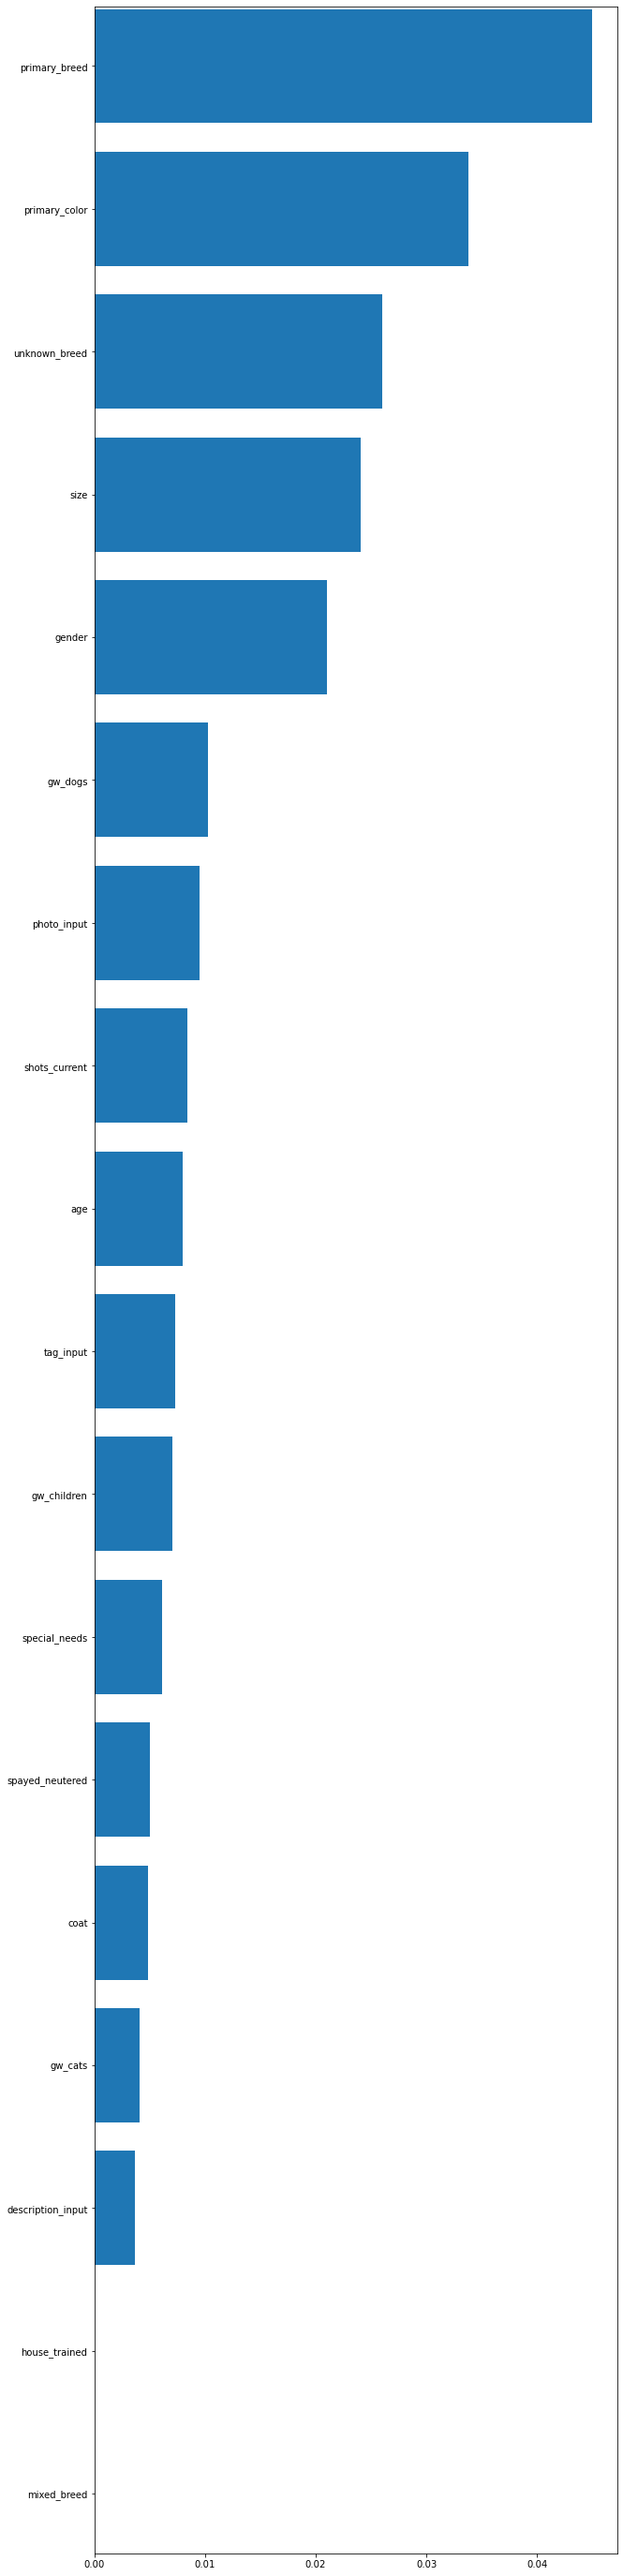

In [73]:
features = sorted(zip(X.columns, clf_scaled.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [75]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [77]:
from sklearn.ensemble import RandomForestRegressor

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/owner/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: could not convert string to float: 'longer'